In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy 
from sympy import init_printing
from sympy.utilities.lambdify import lambdify

In [2]:
#Constructing initial value condition
init_printing(use_latex=True)
x, nu, t = sympy.symbols('x nu t')
phi = sympy.exp(-(x-4*t)**2/(4*nu*(t+1)))+sympy.exp(-(x-4*t-2*sympy.pi)**2/(4*nu*(t+1)))

phiprime=phi.diff(x)
phiprime

u=-2*nu*phiprime/phi+4

ufunc=lambdify((t,x,nu),u)
print(ufunc(1,4,3))

3.49170664206445


In [3]:
#Burger's equation
nx=101
dx=2*np.pi/(nx-1)
nt=100
nu=0.07                             #diffusion parameter (viscosity)
#sigma=0.2
dt=dx*nu

x=np.linspace(0, 2*np.pi, nx)
t=0

#Initial Condition
u=ufunc(t,x,nu)
print(u)

[4.         4.06283185 4.12566371 4.18849556 4.25132741 4.31415927
 4.37699112 4.43982297 4.50265482 4.56548668 4.62831853 4.69115038
 4.75398224 4.81681409 4.87964594 4.9424778  5.00530965 5.0681415
 5.13097336 5.19380521 5.25663706 5.31946891 5.38230077 5.44513262
 5.50796447 5.57079633 5.63362818 5.69646003 5.75929189 5.82212374
 5.88495559 5.94778745 6.0106193  6.07345115 6.136283   6.19911486
 6.26194671 6.32477856 6.38761042 6.45044227 6.51327412 6.57610598
 6.63893783 6.70176967 6.76460125 6.82742866 6.89018589 6.95176632
 6.99367964 6.72527549 4.         1.27472451 1.00632036 1.04823368
 1.10981411 1.17257134 1.23539875 1.29823033 1.36106217 1.42389402
 1.48672588 1.54955773 1.61238958 1.67522144 1.73805329 1.80088514
 1.863717   1.92654885 1.9893807  2.05221255 2.11504441 2.17787626
 2.24070811 2.30353997 2.36637182 2.42920367 2.49203553 2.55486738
 2.61769923 2.68053109 2.74336294 2.80619479 2.86902664 2.9318585
 2.99469035 3.0575222  3.12035406 3.18318591 3.24601776 3.308849

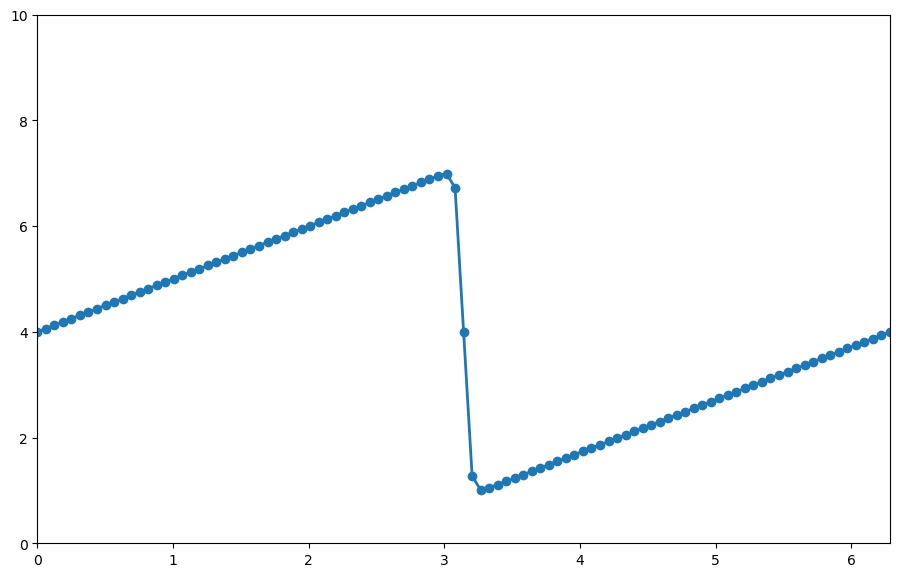

In [4]:
#Plotting the initial condition
plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x, u, marker='o', lw=2)
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10])
plt.show()

In [5]:
#Changing u according to the timestep
for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2*(un[i+1] - 2 * un[i] + un[i-1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 *(un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]
    
print(u)

[2.77501411 2.81860393 2.86219375 2.90578357 2.94937339 2.99296321
 3.03655303 3.08014285 3.12373267 3.16732249 3.21091231 3.25450213
 3.29809195 3.34168177 3.38527159 3.42886141 3.47245123 3.51604105
 3.55963087 3.60322069 3.64681051 3.69040033 3.73399015 3.77757997
 3.82116979 3.86475961 3.90834943 3.95193925 3.99552907 4.03911889
 4.08270871 4.12629853 4.16988835 4.21347816 4.25706798 4.3006578
 4.34424762 4.38783744 4.43142726 4.47501708 4.5186069  4.56219672
 4.60578654 4.64937636 4.69296618 4.736556   4.78014582 4.82373564
 4.86732546 4.91091528 4.95450509 4.9980949  5.0416847  5.08527447
 5.12886415 5.17245365 5.21604272 5.25963077 5.30321645 5.34679663
 5.39036412 5.43390242 5.4773738  5.52069226 5.56366213 5.60583953
 5.64622005 5.68253942 5.70972375 5.71653417 5.67868075 5.54649073
 5.23096356 4.62161195 3.7237691  2.83274015 2.25637999 1.99159854
 1.90314957 1.89369951 1.9164822  1.95196924 1.99240748 2.03477056
 2.07788235 2.12128577 2.1648029  2.2083644  2.25194321 2.29552

In [6]:
#Analytical Solution
u_analytical = np.asarray([ufunc(nt * dt, xi, nu) for xi in x])
print(u_analytical)

[2.77811931 2.82175791 2.8653965  2.9090351  2.95267369 2.99631229
 3.03995089 3.08358948 3.12722808 3.17086667 3.21450527 3.25814387
 3.30178246 3.34542106 3.38905965 3.43269825 3.47633685 3.51997544
 3.56361404 3.60725264 3.65089123 3.69452983 3.73816842 3.78180702
 3.82544562 3.86908421 3.91272281 3.9563614  4.         4.0436386
 4.08727719 4.13091579 4.17455438 4.21819298 4.26183158 4.30547017
 4.34910877 4.39274736 4.43638596 4.48002456 4.52366315 4.56730175
 4.61094035 4.65457894 4.69821754 4.74185613 4.78549473 4.82913333
 4.87277192 4.91641052 4.96004911 5.00368771 5.04732631 5.0909649
 5.1346035  5.17824209 5.22188069 5.26551929 5.30915788 5.35279648
 5.39643507 5.44007367 5.48371227 5.52735086 5.57098946 5.61462805
 5.65826665 5.70190524 5.74554383 5.78918234 5.83282035 5.87645478
 5.92006383 5.96349303 6.00564782 6.0387971  6.00950252 5.59878747
 4.         2.40121253 1.99049748 1.9612029  1.99435218 2.03650697
 2.07993617 2.12354522 2.16717965 2.21081766 2.25445617 2.298094

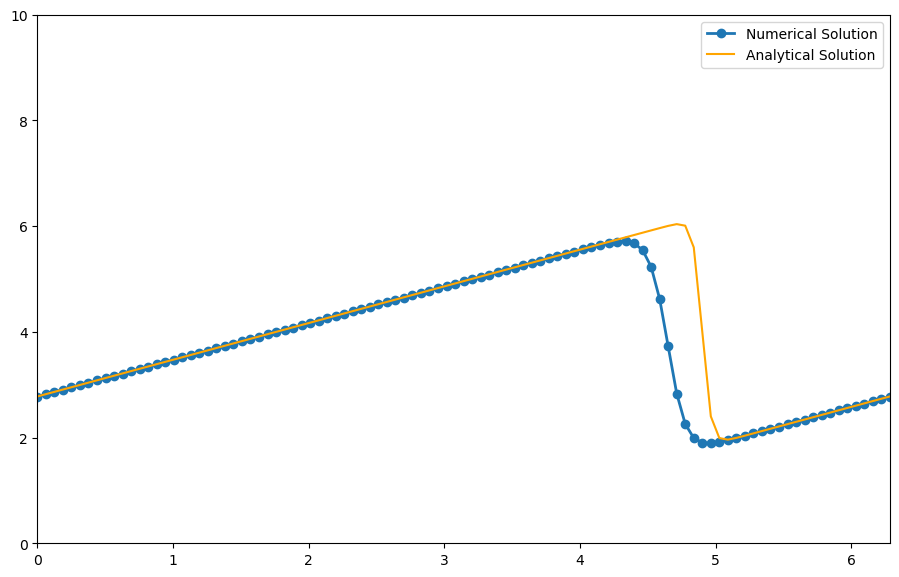

In [7]:
plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x, u, marker='o', lw=2, label="Numerical Solution")
plt.plot(x, u_analytical, color='orange', label="Analytical Solution")
plt.xlim(0, 2*np.pi)
plt.ylim(0,10)
plt.legend()
plt.show()